pada notebook ini akan membuat model unsupervised learning dengan teknik K-Means Clustering untuk menentukan segmentasi pengunjung mall.

**Load Dataset**

In [1]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing Data**

kita akan melakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.

In [2]:
#mengubah nama kolom
df = df.rename(columns={
    'Gender': 'gender', 'Age': 'age','Annual Income (k$)': 'annual_income','Spending Score (1-100)': 'spending_score'
})

#mengubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

#menampilkan data setelah di preprocess
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Membuat model KMeans Clustering**

Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [4]:
from sklearn.cluster import KMeans

#menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i).fit(X)
    clusters.append(kmeans.inertia_)

Buat plot inersia dari setiap nilai K. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5.

Text(0, 0.5, 'Inertia')

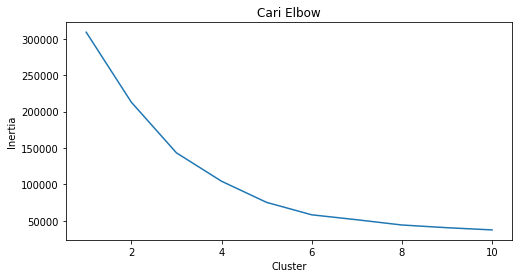

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

Selanjutnya kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

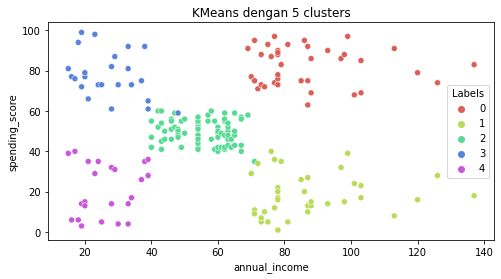

In [6]:
#membuat objek KMeans
kmeans5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = kmeans5.labels_

#membuat plot KMeans dengan 5 karakter
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 clusters')
plt.show()